# End of Distribution imputation

In [1]:
import pandas as pd
df=pd.read_csv('titanic_train.csv', usecols=['age','fare','survived'])
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [2]:
extreme=df.age.mean()+3*df.age.std()

C:\Users\Personal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

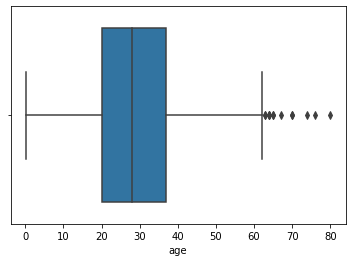

In [3]:
import seaborn as sns
sns.boxplot('age',data=df)

In [4]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [5]:
impute_nan(df,'age',df.age.median(),extreme)

In [6]:
df.head()

,age,fare,survived,age_end_distribution
0,28.0,7.7333,1,73.206577
1,38.0,8.6625,0,38.000000
2,30.0,24.1500,0,30.000000
3,54.0,23.0000,1,54.000000
4,40.0,13.0000,0,40.000000


<AxesSubplot:>

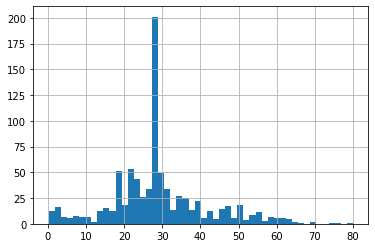

In [7]:
df['age'].hist(bins=50)

<AxesSubplot:>

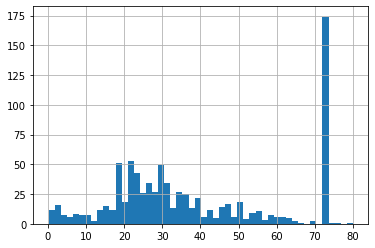

In [8]:
df['age_end_distribution'].hist(bins=50)

C:\Users\Personal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_end_distribution'>

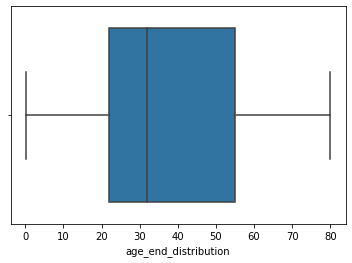

In [9]:
sns.boxplot('age_end_distribution',data=df)

# Arbitrary Value Imputation

This is an important technique used in Imputation as it can handle both the Numerical and Categorical variables. This technique states that we group the missing values in a column and assign them to a new value that is far away from the range of that column. Mostly we use values like 99999999 or -9999999 or “Missing” or “Not defined” for numerical & categorical variables.

Assumptions:-

    Data is not Missing At Random.
    The missing data is imputed with an arbitrary value that is not part of the dataset or Mean/Median/Mode of data.

Advantages:-

    Easy to implement.
    We can use it in production.
    It retains the importance of “missing values” if it exists.

Disadvantages:-

    Can distort original variable distribution.
    Arbitrary values can create outliers.
    Extra caution required in selecting the Arbitrary value.

When to Use:-

    When data is not MAR(Missing At Random).
    Suitable for All.



In [10]:
df=pd.read_csv('titanic_train.csv',usecols=['age','fare','cabin'])
df.head()

,age,fare,cabin
0,NaN,7.7333,NaN
1,38.0,8.6625,NaN
2,30.0,24.1500,NaN
3,54.0,23.0000,NaN
4,40.0,13.0000,NaN


In [11]:
df['cabin'].unique()

array([nan, 'C82', 'D15', 'C50', 'E33', 'B57 B59 B63 B66', 'E34', 'C83',
       'C125', 'B82 B84', 'B96 B98', 'B51 B53 B55', 'C132', 'C31', 'C68',
       'B94', 'F E46', 'C126', 'D34', 'B28', 'C65', 'B52 B54 B56', 'D17',
       'C86', 'C7', 'E25', 'E17', 'D56', 'A9', 'B26', 'C91', 'B5', 'D',
       'A23', 'C22 C26', 'C124', 'E63', 'B35', 'B18', 'C6', 'B49', 'B19',
       'G6', 'D35', 'C23 C25 C27', 'C62 C64', 'B73', 'E12', 'B41', 'A20',
       'B69', 'C78', 'A14', 'D26', 'C51', 'B79', 'E52', 'C49', 'C104',
       'B61', 'D43', 'D48', 'C123', 'A7', 'D47', 'D49', 'B80', 'A29',
       'F38', 'B58 B60', 'A34', 'D33', 'D20', 'F G63', 'T', 'A6',
       'C55 C57', 'B38', 'E49', 'F4', 'E121', 'C85', 'C87', 'B86', 'B102',
       'C111', 'D22', 'B22', 'B77', 'B50', 'B30', 'E36', 'F33', 'E60',
       'B39', 'C118', 'D21', 'F2', 'E39 E41', 'E101', 'A32', 'D38',
       'C101', 'C54', 'C106', 'C32', 'D36', 'E50', 'D40', 'C30', 'C52',
       'C130', 'C80', 'F G73', 'E10', 'B10', 'B24', 'C2', 'D28', '

In [12]:
 df['cabin'].isnull().sum()

659

In [13]:
def impute(variable):
    
    df[variable+'_arbitary_values']=df[variable].fillna('missing') # WE ARE REPLACING CATEGORIAL VALUES WITH "MISSING"

In [14]:
impute('cabin')

In [15]:
df.head()

,age,fare,cabin,cabin_arbitary_values
0,NaN,7.7333,NaN,missing
1,38.0,8.6625,NaN,missing
2,30.0,24.1500,NaN,missing
3,54.0,23.0000,NaN,missing
4,40.0,13.0000,NaN,missing


In [16]:
# wse can replace nominal values with 99999 like or -1

In [17]:
def impute(var):
    df[var+'_arbitary_values']=df[var].fillna('9999')

In [18]:
impute('age')

In [19]:
df

,age,fare,cabin,cabin_arbitary_values,age_arbitary_values
0,NaN,7.7333,NaN,missing,9999
1,38.0,8.6625,NaN,missing,38.0
2,30.0,24.1500,NaN,missing,30.0
3,54.0,23.0000,NaN,missing,54.0
4,40.0,13.0000,NaN,missing,40.0
...,...,...,...,...,...
845,55.0,50.0000,C39,C39,55.0
846,58.0,29.7000,B37,B37,58.0
847,24.0,26.0000,NaN,missing,24.0
848,3.0,13.7750,NaN,missing,3.0


In [20]:
df=pd.read_csv('train.csv')

In [21]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Frequent Category Imputation(mode replace)

Assumptions:-

    Data is missing at random.
    There is a high probability that the missing data looks like the majority of the data.

Advantages:-

    Implementation is easy.
    We can obtain a complete dataset in very little time.
    We can use this technique in the production model.

Disadvantages:-

    The higher the percentage of missing values, the higher will be the distortion.
    May lead to over-representation of a particular category.
    Can distort original variable distribution.

When to Use:-

    Data is Missing at Random(MAR)
    Missing data is not more than 5% – 6% of the dataset.



In [23]:
df=pd.read_csv('train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [24]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [25]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [26]:
df.isnull().mean().sort_values() # THERE IS ONLY 2.5%  AND 5.5% NULL VALUES so we can use frequenrt category imputation

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [27]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

SO WE REPLACE NULL VALUES WITH HIGHEST CATEGORICAL VALUES OR MODE 

In [28]:
def impute(variable):
    df[variable].fillna(df[variable].value_counts().sort_values(ascending=False).index[0],inplace=True)

In [29]:
 for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute(feature)

In [30]:
df.head() # NAN RERPLACED WITH HIGHEST FREQUENCY VALUE 

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


WE CAN ALSO REPLACE BY MODE

In [31]:
df=pd.read_csv('train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [32]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [33]:
df['BsmtQual'].mode()[0]

'TA'

In [34]:
def impute(variable):
    df[variable].fillna(df[variable].mode()[0],inplace=True)
     

In [35]:
for i in ['BsmtQual','FireplaceQu','GarageType']:
    impute(i)

In [36]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


# categorical--- one hot encoding

In [52]:
df=pd.read_csv('mercc.csv',usecols=['X0','X1','X2','X3','X4','X5'])

In [53]:
df.head()

,X0,X1,X2,X3,X4,X5
0,k,v,at,a,d,u
1,k,t,av,e,d,y
2,az,w,n,c,d,x
3,az,t,n,f,d,x
4,az,v,n,f,d,h


In [54]:
df['X0'].value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
i      18
aq     18
am     18
u      17
aw     16
l      16
ad     14
k      11
b      11
au     11
as     10
r      10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
ab      1
g       1
Name: X0, dtype: int64

In [55]:
for i in df.columns:
    print(df[i].value_counts()) # IF WE DIDN'T USE PRINT IT DON'T PRINT

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
i      18
aq     18
am     18
u      17
aw     16
l      16
ad     14
k      11
b      11
au     11
as     10
r      10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
ab      1
g       1
Name: X0, dtype: int64
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
f      23
y      23
j      22
n      19
k      17
p       9
g       6
q       3
ab      3
d       3
Name: X1, dtype: int64
as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
ag      19
z    

IN ONE HOT ENCODING WE CAN US TOP 10 MOST FREQUENTLY REPEATED CATEGORIES WITH ONE HOT ENCODING

In [68]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29


In [86]:
lst_10=df['X1'].value_counts().sort_values(ascending=False).head(10).index
lst_10

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [84]:
lst=list(lst_10)

In [85]:
lst

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [88]:
import numpy as np
for i in lst:
    df[i]=np.where(df['X1']==i,1,0)

In [91]:
df[lst]

,aa,s,b,l,v,r,i,a,c,o
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,1
4206,0,0,0,0,1,0,0,0,0,0
4207,0,0,0,0,0,1,0,0,0,0
